Notebook displaying an example regionalization via the greedy algorithm for the Baton Rouge CBSA in Louisiana

In [6]:
import pickle
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

from greedy_algorithm import greedy_opt

# LaTeX preamble
matplotlib.rcParams.update({'text.usetex': True})
matplotlib.rcParams.update({'text.latex.preamble': r"",
                            "font.serif": "Times"})
matplotlib.rcParams.update({'font.family':'serif'})

In [8]:
# Load pickled data for the Baton Rouge CBSA. Data is stored in a dictionary with the following keys:
#   'Name' - Name of the MSA
#   'Class' - Statistical classification of the MSA (one of "CBSA", "CSA", or "state")
#   'N' - Number of nodes in the MSA
#   'Spatial Edgelist' - List of tuples representing the spatial edges in the MSA
#   'Flow Edgelist' - List of tuples representing the flow edges in the MSA
fName = "Baton Rouge, LA.pkl"
with open(fName, "rb") as f:
    data = pickle.load(f)

# Load the geospatial data (needed for plotting)
fName = "geo_gdf.pkl"
with open(fName, "rb") as f:
    geo_gdf = pickle.load(f)

# Create a dictionary mapping indices to 'GEOID10' values (needed for plotting)
index_to_geoid = {i: geoid for i, geoid in enumerate(geo_gdf["GEOID10"])}

In [9]:
# Unpack the data
name = data["Name"]
N = data["N"]
spatial_elist = data["Spatial Edgelist"]
flow_elist = data["Flow Edgelist"]

# Run the greedy algorithm
print(f"Running greedy algorithm on {name}...")
DLs, partitions = greedy_opt(N, spatial_elist, flow_elist)

Running greedy algorithm on Baton Rouge, LA...


In [10]:
# Map node inidces back to GEOIDs
clusters = []
for partition in partitions[-1]:
    fips_set = set()
    for node_idx in partition:
        fips_set.add(index_to_geoid[node_idx])
    clusters.append(fips_set)

# Map group labels to tracts
geo_gdf["group_label"] = pd.Series()
for i, cluster in enumerate(clusters):
    geo_gdf.loc[geo_gdf["GEOID10"].isin(cluster), "group_label"] = i

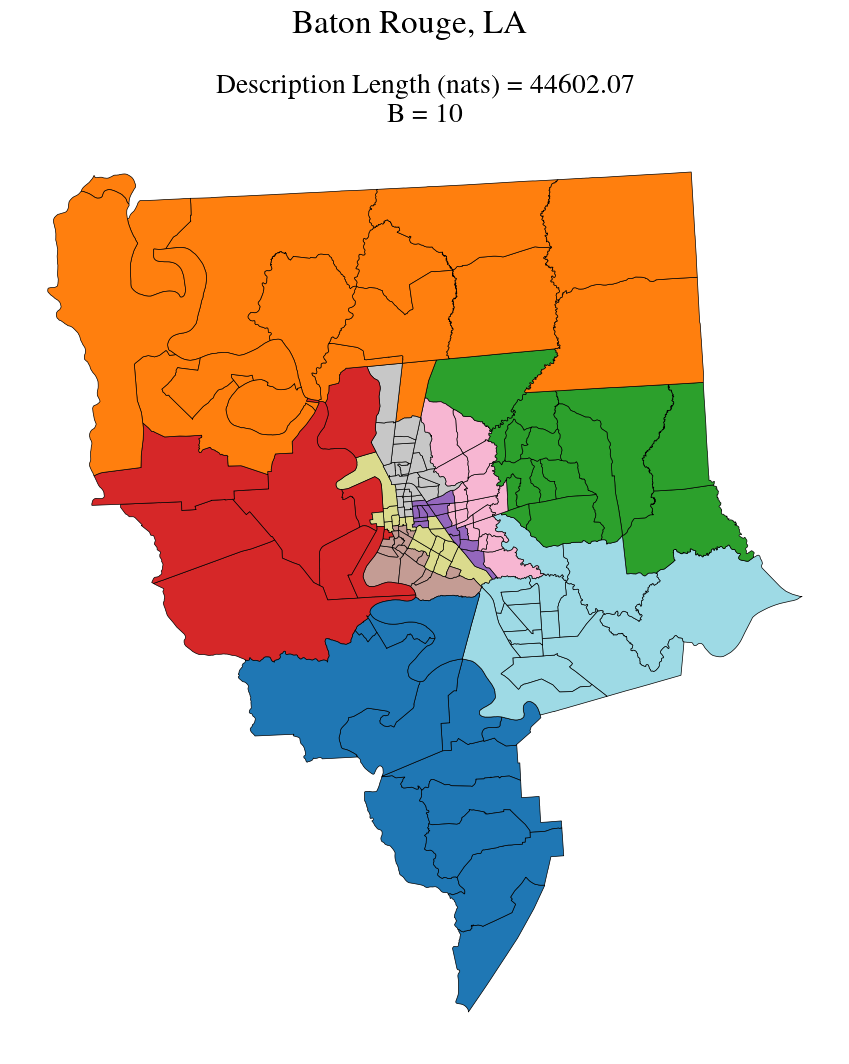

In [11]:
# Plot: Colors indicate the inferred partitions, lines demarcate the underlying tract subdivisions
B = len(clusters)
fig, ax = plt.subplots(figsize=(12, 12))
geo_gdf.plot(column="group_label", ax=ax, edgecolor="black", linewidth=0.5, cmap="tab20")
ax.set_title(f"Description Length (nats) = {DLs[-1]:.2f} \n B = {B}", fontsize=20)
plt.suptitle(name, fontsize=24)
plt.axis(False)
plt.show()